In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',10)
pd.set_option('display.width',350)

In [3]:
from google.colab import files
uploaded = files.upload()


Saving conversion_project.xlsx to conversion_project.xlsx


In [2]:
df = pd.read_excel('/Users/anqibu/Downloads/project1/conversion_project.xlsx')

# **Data Cleaning:**

In [5]:
df.shape

(316200, 6)

In [6]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25.0,1.0,Ads,1.0,0.0
1,US,23.0,1.0,Seo,5.0,0.0
2,US,28.0,1.0,Seo,4.0,0.0
3,China,39.0,1.0,Seo,5.0,0.0
4,US,30.0,1.0,Seo,6.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              316200 non-null  object 
 1   age                  316200 non-null  float64
 2   new_user             316200 non-null  float64
 3   source               316200 non-null  object 
 4   total_pages_visited  316200 non-null  float64
 5   converted            316200 non-null  float64
dtypes: float64(4), object(2)
memory usage: 14.5+ MB


#### Missing values:

In [9]:
df[df.isnull().values==True]

,country,age,new_user,source,total_pages_visited,converted


No missing values found. 

#### Outliers:


In [10]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In the case of converted customers, we only need to see if there is strange values for age(too old or too small), new_user & converted(which is not 0 or 1), total pages visited (< 1):

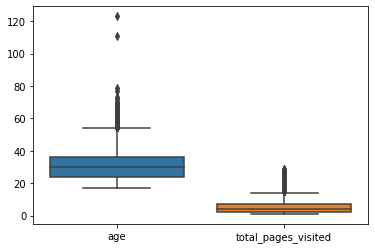

In [47]:
features = ['age','total_pages_visited']
sns.boxplot(data = df[features])

In [57]:
df[(df['age']>100)]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123.0,0.0,Seo,15.0,1.0
295581,UK,111.0,0.0,Ads,10.0,1.0


There are two outliers in ages. We need to do a regression to guess the true age here.

In [25]:
cor = df.corr()
cor

,age,new_user,total_pages_visited,converted
age,1.000000,0.012343,-0.045922,-0.088797
new_user,0.012343,1.000000,-0.082541,-0.152374
total_pages_visited,-0.045922,-0.082541,1.000000,0.528994
converted,-0.088797,-0.152374,0.528994,1.000000


<AxesSubplot:>

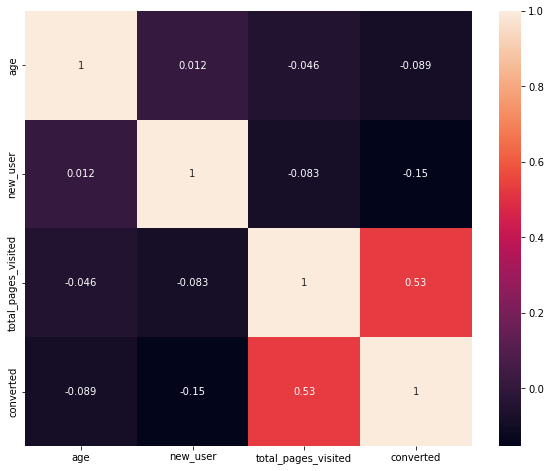

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

From correlation image, we can see age has a negative correlation with converted and total_pages_visited. Since the converted variable is our response variable, we do not want to use the converted to guess ages.

##### Fill in outliers of age:
Next, to deal with outliers in age category, we want to use a regression to predict the missing values.

In [32]:
df[(df['age']>100)]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123.0,0.0,Seo,15.0,1.0
295581,UK,111.0,0.0,Ads,10.0,1.0


In [39]:
df_country = pd.get_dummies(df['country'], drop_first=True)
temp = pd.concat([df,df_country], axis=1)
temp.head()

,country,age,new_user,source,total_pages_visited,converted,Germany,UK,US
0,UK,25.0,1.0,Ads,1.0,0.0,0,1,0
1,US,23.0,1.0,Seo,5.0,0.0,0,0,1
2,US,28.0,1.0,Seo,4.0,0.0,0,0,1
3,China,39.0,1.0,Seo,5.0,0.0,0,0,0
4,US,30.0,1.0,Seo,6.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...
316195,US,26.0,1.0,Ads,9.0,0.0,0,0,1
316196,US,27.0,1.0,Direct,6.0,0.0,0,0,1
316197,China,25.0,0.0,Ads,4.0,0.0,0,0,0
316198,US,22.0,0.0,Seo,4.0,0.0,0,0,1


In [40]:
temp1 = temp[-(temp['age']>100)]
temp1.describe()

,age,new_user,total_pages_visited,converted,Germany,UK,US
count,316198.000000,316198.000000,316198.000000,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252,0.041287,0.153224,0.563229
std,8.268958,0.464329,3.341053,0.176669,0.198955,0.360203,0.495987
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000
75%,36.000000,1.000000,7.000000,0.000000,0.000000,0.000000,1.000000
max,79.000000,1.000000,29.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
temp2 = temp[(temp['age']>100)]


In [48]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(temp1[['Germany','UK','US']], temp1[['age']])

/var/folders/96/pgql1xtn6zb7ym6v30njhs9m0000gn/T/ipykernel_8119/2682712999.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(temp1[['Germany','UK','US']], temp1[['age']])


RandomForestClassifier(random_state=42)

In [49]:
temp_age = forest.predict(temp2[['Germany','UK','US']])
temp_age


array([25., 27.])

In [79]:
df.loc[(df.age > 100),'age'] = [25,27]
df.iloc[90928,295581]

In [81]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569282,0.685465,4.872966,0.032258
std,8.268940,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


In other cases we could use mean to guess the missing ages:

In [56]:
df[(df.country == 'Germany')].age.mean()

30.0

In [55]:
df[(df.country == 'UK')].age.mean()

30.0

## Exploratory Data Analysis

Text(0, 0.5, 'totol_pages_visited')

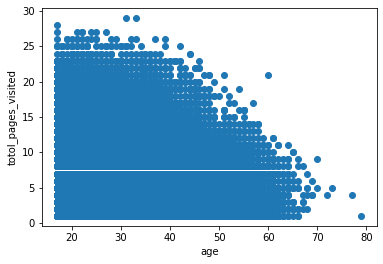

In [82]:
plt.plot(df.age,df.total_pages_visited,'o')
plt.xlabel('age')
plt.ylabel('totol_pages_visited')

### Tableau visualization:

#### Countries and Conversion rate:
1. UK and Germany have highest conversion rates; 
2. Germany has not many users compared to other countries;
3. China has very small conversion rate.

(The tableau plot was made before data cleaning so there are two outliers in the age graph)

In [1]:
%%html
<script type='text/javascript' src='https://prod-useast-a.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1000px; height: 827px;'><object class='tableauViz' width='1000' height='827' style='display:none;'><param name='host_url' value='https%3A%2F%2Fprod-useast-a.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;anqibu' /><param name='name' value='conversion_rate&#47;1&#47;5cf972b4-b86e-4456-afa5-a79aa61e2fe0&#47;1b50c84f-7531-443b-92b8-be0a3fba9eac' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>

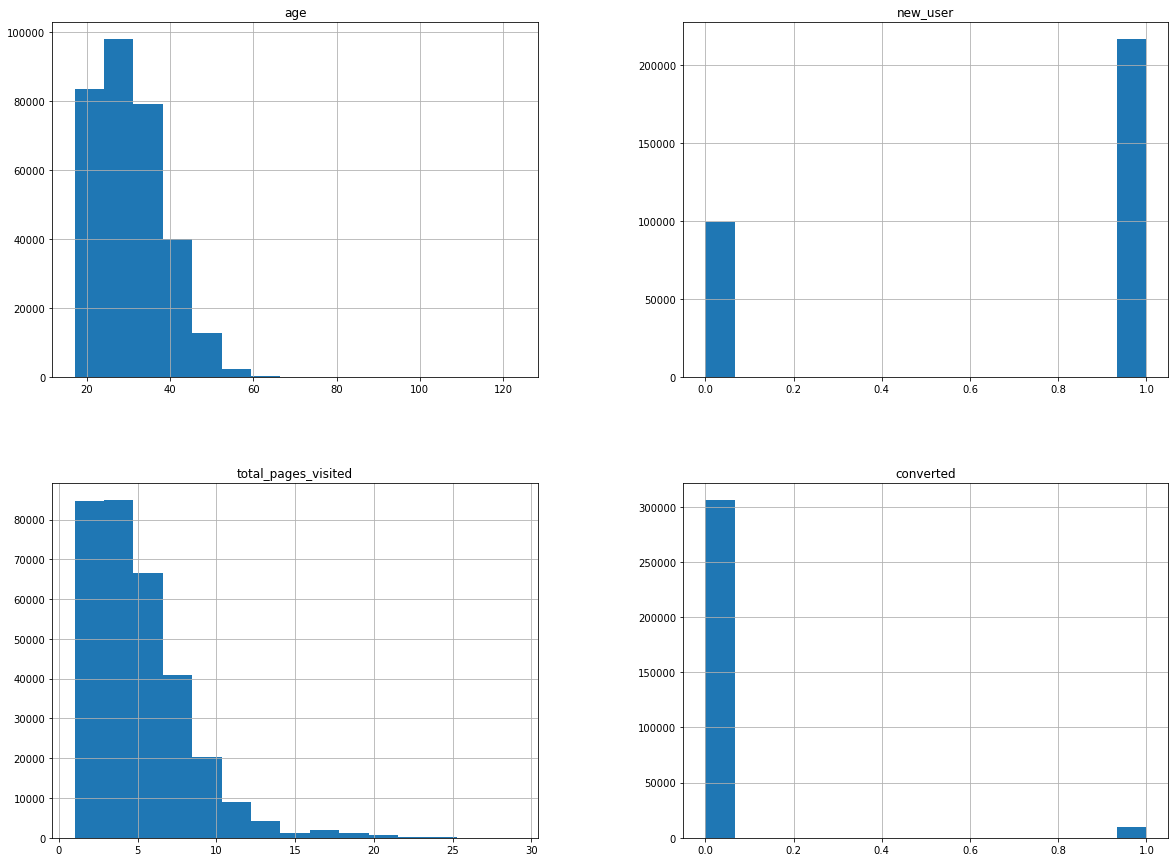

In [3]:
df.hist(bins=15,figsize=(20,15))
plt.show()

#### Country and Conversion rate:

In [8]:
df[['country','converted']].groupby('country').mean().sort_values(by='converted', ascending=False)

,converted
country,
Germany,0.062500
UK,0.052632
US,0.037801
China,0.001332


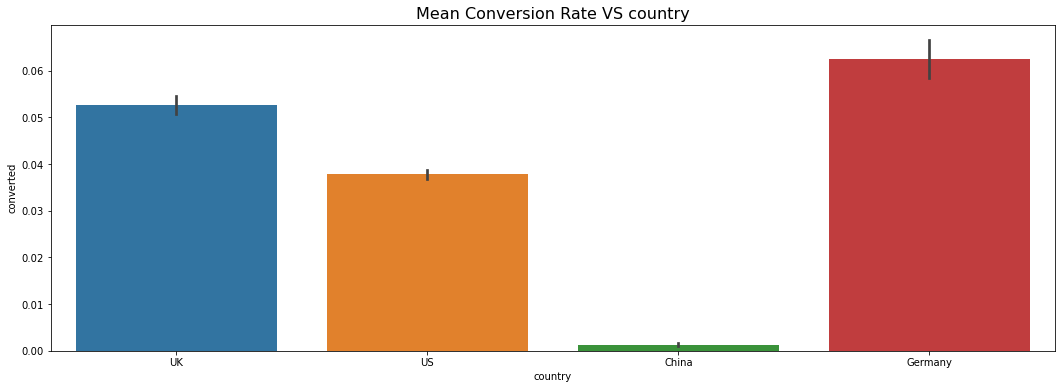

In [6]:
plt.figure(figsize=(18,6))
sns.barplot(x='country',y='converted', data= df)
# bar plot automatically provides the mean of the converted 
plt.title('Mean Conversion Rate VS country', fontsize=16);

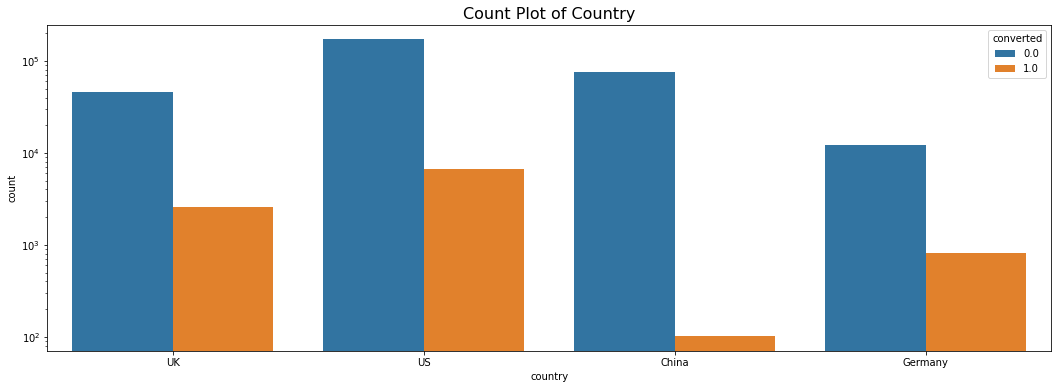

In [7]:
plt.figure(figsize=(18,6))
sns.countplot(x='country', hue='converted', data=df)
plt.title('Count Plot of Country', fontsize=16)
plt.yscale('log'); # y axis unit need to change

Germany have a great conversion rate, however does not have as many users as other countries.

#### Source and Conversion rate:

In [9]:
df[['source','converted']].groupby('source').mean().sort_values(by='converted', ascending=False)

,converted
source,
Ads,0.034483
Seo,0.032895
Direct,0.028169


Text(0.5, 1.0, 'Mean conversion rate vs Source')

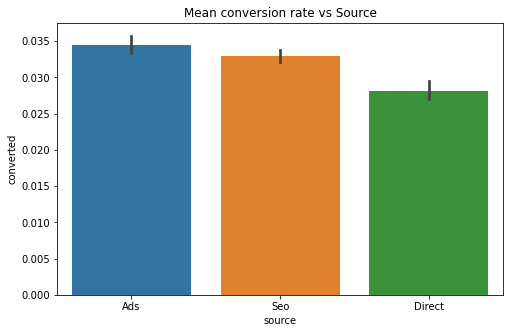

In [19]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'source',y = 'converted',data = df)
plt.title('Mean conversion rate vs Source',fontsize = 16)

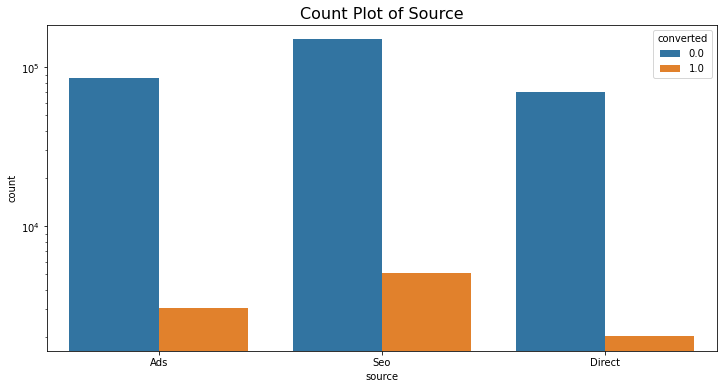

In [87]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'source',hue = 'converted',data = df)
plt.title('Count Plot of Source', fontsize=16)
plt.yscale('log')#rescale to have a better figure on converted = 1

In [4]:
df['converted'].value_counts()

0.0    306000
1.0     10200
Name: converted, dtype: int64

The convert rate is a little unbalanced.

In [5]:
df['new_user'].value_counts()

1.0    216744
0.0     99456
Name: new_user, dtype: int64

#### Age and Conversion rate:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


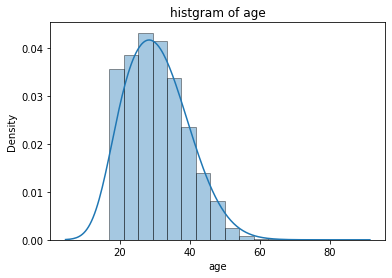

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


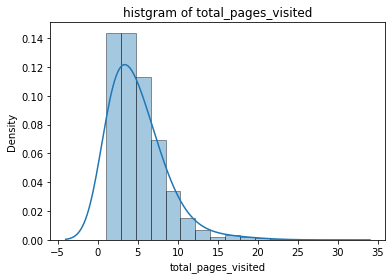

In [62]:
features = ['age','total_pages_visited']
for i in features:
    sns.distplot(df[i],kde = True, bins = 15, kde_kws=dict(bw=0.5), hist_kws= dict(edgecolor="k"))
    plt.title("histgram of {0}".format(i))
    plt.show()

Using displot() creates overfitting for total_pages_visited. So here I used distplot() to get a better picture.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


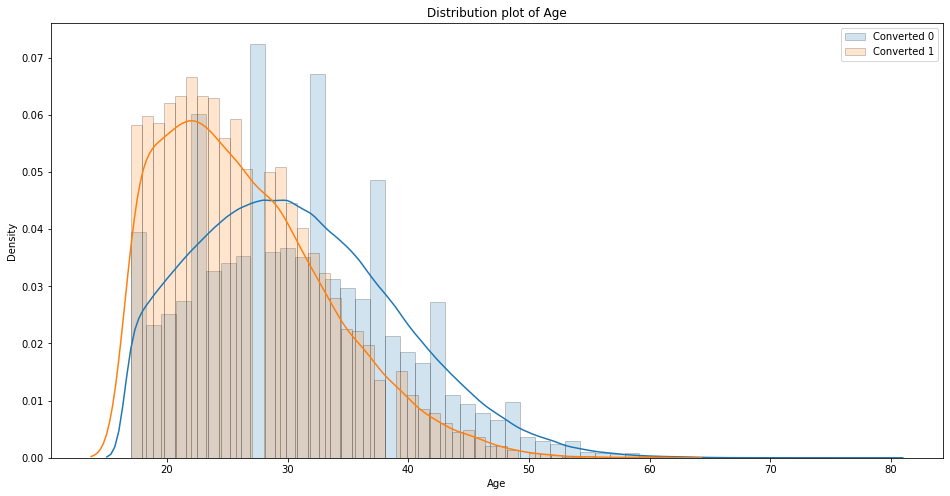

In [89]:
hist_kws = {'histtype':'bar', 'edgecolor':'black', 'alpha': 0.2}

plt.figure(figsize=(16,8))
sns.distplot(df[df['converted'] == 0]['age'], label='Converted 0', hist_kws = hist_kws)
sns.distplot(df[df['converted'] == 1]['age'], label='Converted 1', hist_kws = hist_kws)
plt.legend()
plt.title('Distribution plot of Age')
plt.xlabel('Age');
# y axis is the probability density function for the kernel density estimation
# distplot usually used for two distplot comparison

In [84]:
mean_age = df.groupby('age')['converted'].mean().reset_index()
mean_age.head()

,age,converted
0,17.0,0.071607
1,18.0,0.066029
2,19.0,0.058616
3,20.0,0.057109
4,21.0,0.053985


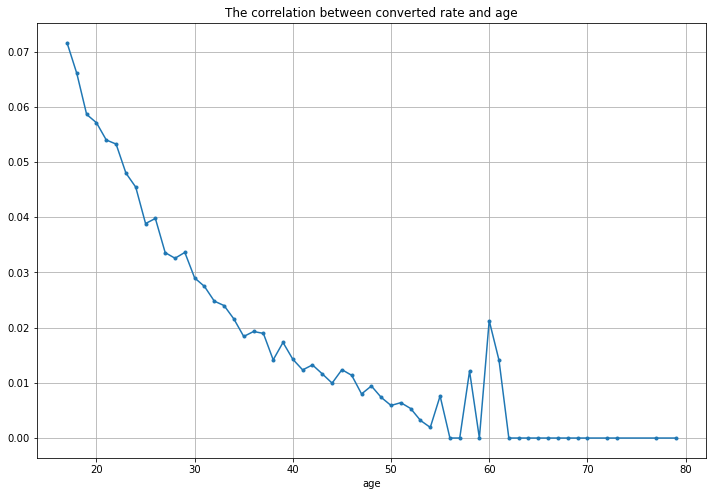

In [85]:
plt.figure(figsize=(12,8))
plt.plot(mean_age['age'], mean_age['converted'], '.-')
plt.title('The correlation between converted rate and age')
plt.xlabel('age')
plt.grid(True);

#### Total pages visited and Convertion rate:

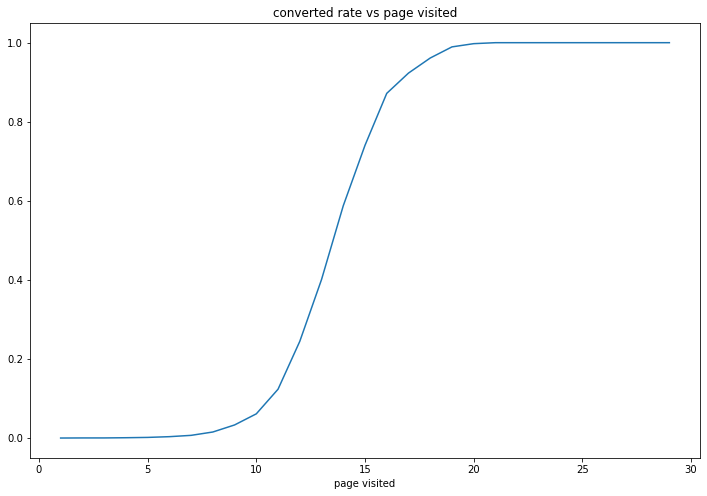

In [100]:
plt.figure(figsize=(12,8))
mean_page = df.groupby('total_pages_visited')['converted'].mean().reset_index()
plt.plot(mean_page['total_pages_visited'], mean_page['converted'])
plt.title('converted rate vs page visited')
plt.xlabel('page visited');

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarn

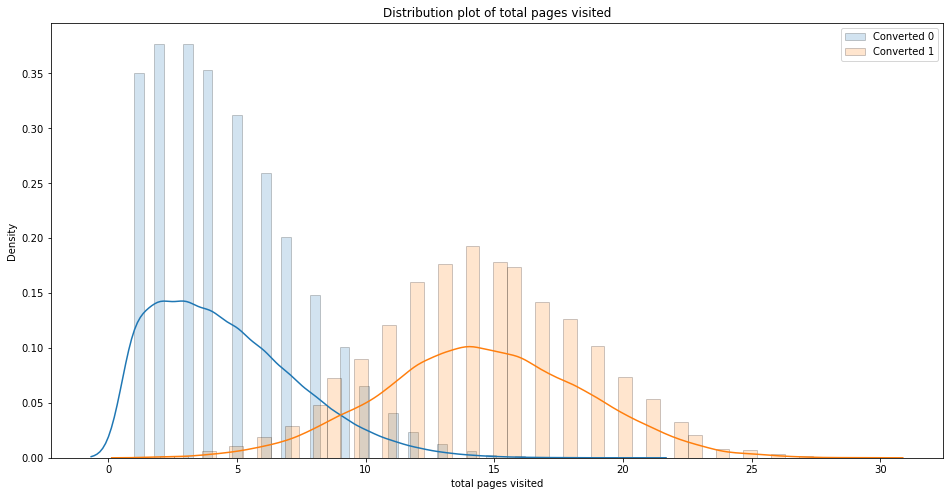

In [99]:
hist_kws = {'histtype':'bar', 'edgecolor':'black', 'alpha': 0.2}

plt.figure(figsize=(16,8))
sns.distplot(df[df['converted'] == 0]['total_pages_visited'], label='Converted 0', kde_kws = dict(bw=0.2), hist_kws = hist_kws)
sns.distplot(df[df['converted'] == 1]['total_pages_visited'], label='Converted 1', hist_kws = hist_kws)
plt.legend()
plt.title('Distribution plot of total pages visited')
plt.xlabel('total pages visited');

In [65]:
cor = df.corr()
cor

,age,new_user,total_pages_visited,converted
age,1.000000,0.012445,-0.046093,-0.089199
new_user,0.012445,1.000000,-0.082522,-0.152338
total_pages_visited,-0.046093,-0.082522,1.000000,0.528975
converted,-0.089199,-0.152338,0.528975,1.000000


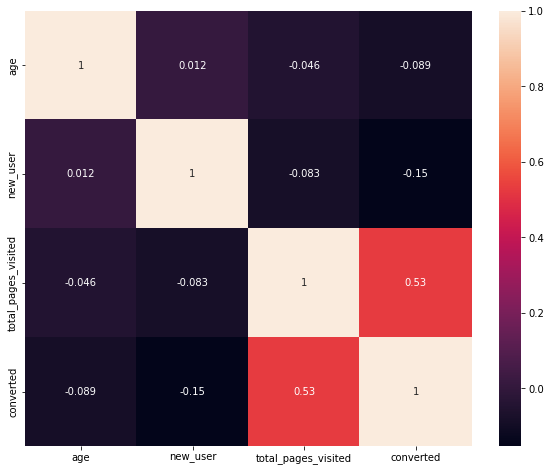

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

Between converted and total_pages_visited, there is a strong positive correlation. For other variables the correlations are weak and can be seem as not corrolated.

# **Prediction:**

We want to build a model to predict conversion rate. Outcome is binary and we care about insights to give product and marketing team some ideas. Following are the models to try out:

- Logistic regression
- Decision Trees
- RuleFit 
- Random Forest in combination with partial dependence plots

In [102]:
df_country = pd.get_dummies(df['country'], drop_first=True)
df = pd.concat([df,df_country], axis=1)

df_source = pd.get_dummies(df['source'], drop_first=True)
df = pd.concat([df, df_source], axis=1)
df.head()

,country,age,new_user,source,total_pages_visited,converted,Germany,UK,US,Direct,Seo
0,UK,25.0,1.0,Ads,1.0,0.0,0,1,0,0,0
1,US,23.0,1.0,Seo,5.0,0.0,0,0,1,0,1
2,US,28.0,1.0,Seo,4.0,0.0,0,0,1,0,1
3,China,39.0,1.0,Seo,5.0,0.0,0,0,0,0,1
4,US,30.0,1.0,Seo,6.0,0.0,0,0,1,0,1


#### Logistic regression model (on unblanced data):
> Assumptions for logistic regression models: <br>
The DV is categorical (binary); Checked <br>
Independence of observations; Checked <br>
Independent variables are linearly related to the log odds; <br>
Absence of multicollinearity; <br>
Lack of outliers; Checked 

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(['converted','country', 'source'], axis=1)
y = df['converted']
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
model = LogisticRegression()
model.fit(X_train, y_train)

intercept = model.intercept_
coeff = model.coef_
coef_list = list(coeff[0,:])
coef_df = pd.DataFrame({'Feature': list(X_train.columns),'Coefficient': coef_list})
print(coef_df)  


               Feature  Coefficient
0                  age    -0.076931
1             new_user    -1.754494
2  total_pages_visited     0.762821
3              Germany     3.510315
4                   UK     3.364284
5                   US     2.968743
6               Direct    -0.190867
7                  Seo    -0.017607


In [118]:
predicted_prob = model.predict_proba(X_test)[:,1] ##

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])

print(cm)

            Predicted No  Predicted Yes   Total
Actual No         100638            427  101065
Actual Yes          1008           2273    3281
Total             101646           2700  104346


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    101065
         1.0       0.84      0.69      0.76      3281

    accuracy                           0.99    104346
   macro avg       0.92      0.84      0.88    104346
weighted avg       0.99      0.99      0.99    104346



Because of the unblanced data, the chance of detecting true positive among TF and FN is low at 0.69, meaning we will miss out 31% of our experiement group population and wrongly guessed they will not convert on the site. 

In [120]:
# performance
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')

Accuracy Score: 0.9862476760009967
Area Under Curve: 0.8442757943959012
Recall score: 0.6927765925022858


In [121]:
feat_importances = coef_df #what we created before for coeff
feat_importances['importances'] = np.abs(feat_importances['Coefficient']) #coeff is feature importance
feat_importances.sort_values(by='importances', ascending=False, inplace=True)
feat_importances

,Feature,Coefficient,importances
3,Germany,3.510315,3.510315
4,UK,3.364284,3.364284
5,US,2.968743,2.968743
1,new_user,-1.754494,1.754494
2,total_pages_visited,0.762821,0.762821
6,Direct,-0.190867,0.190867
0,age,-0.076931,0.076931
7,Seo,-0.017607,0.017607


#### Weighted Logistic Regression model:

In [133]:
weight = df.converted.value_counts()/df.shape[0]
weight

0.0    0.967742
1.0    0.032258
Name: converted, dtype: float64

In [136]:
w = {0:weight[1],1:weight[0]}
w

{0: 0.03225806451612903, 1: 0.967741935483871}

In [137]:
model2 = LogisticRegression(class_weight = w)
model2.fit(X_train,y_train)
# test
y_pred = model2.predict(X_test)
# performance
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score: 0.9416364786383762
Confusion Matrix: 
[[95182  5883]
 [  207  3074]]
Area Under Curve: 0.9393497079932912
Recall score: 0.9369094788174337
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    101065
         1.0       0.34      0.94      0.50      3281

    accuracy                           0.94    104346
   macro avg       0.67      0.94      0.74    104346
weighted avg       0.98      0.94      0.95    104346



The recall has been much better but the f1-score, which balanced the precision and recall indicates the performance of prediction is not as good as unbalanced one. Indicating the test sample is also extremely unbalanced, which we can also see from the low precision score. Because the data is unblanced, false positive rate for highly imbalanced datasets is pulled down due to a large number of true negatives, and thus the AUC score cannot be taken for credit here.

In [139]:
coeff = model2.coef_
coef_list = list(coeff[0,:])
coef_df = pd.DataFrame({'Feature': list(X_train.columns),'Coefficient': coef_list})
print(coef_df)  

feat_importances = coef_df #what we created before for coeff
feat_importances['importances'] = np.abs(feat_importances['Coefficient']) #coeff is feature importance
feat_importances.sort_values(by='importances', ascending=False, inplace=True)
feat_importances

               Feature  Coefficient
0                  age    -0.073186
1             new_user    -1.690556
2  total_pages_visited     0.755555
3              Germany     3.307316
4                   UK     3.137712
5                   US     2.809079
6               Direct    -0.113673
7                  Seo     0.050263


,Feature,Coefficient,importances
3,Germany,3.307316,3.307316
4,UK,3.137712,3.137712
5,US,2.809079,2.809079
1,new_user,-1.690556,1.690556
2,total_pages_visited,0.755555,0.755555
6,Direct,-0.113673,0.113673
0,age,-0.073186,0.073186
7,Seo,0.050263,0.050263


The feature importance rank is the same as the last logistic regression on unblanced data.<br/>
We see the new_user feature is very important, meaning we could forcus on the old users beacuse they are more willing to convert.

#### Random Forest
I pick a random forest cause: it usually requires very little time to optimize it (its default params are often close to the best ones) and it is strong with outliers, irrelevant variables, continuous and discrete variables. I will use the random forest to predict conversion, then I will use its partial dependence plots and variable importance to get insights about how it got information from the variables. Also, I will build a simple tree to find the most obvious user segments and see if they agree with RF partial dependence plots.

In [140]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [141]:
y_pred = forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    101065
         1.0       0.80      0.67      0.73      3281

    accuracy                           0.98    104346
   macro avg       0.90      0.83      0.86    104346
weighted avg       0.98      0.98      0.98    104346



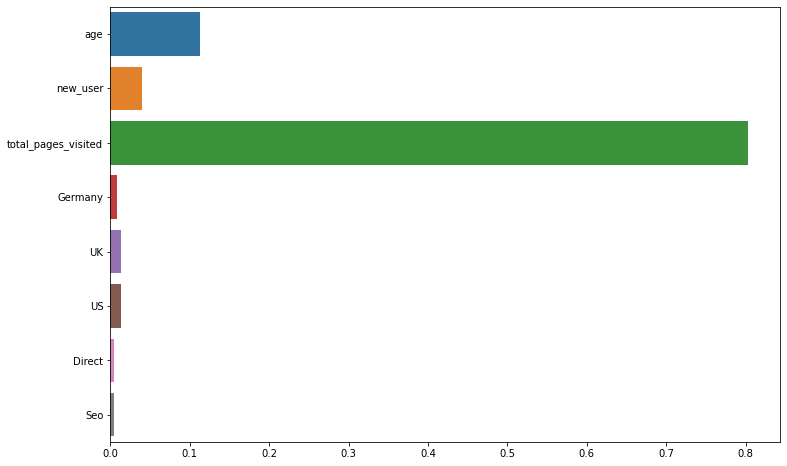

In [142]:
plt.figure(figsize=(12,8))
sns.barplot(x=forest.feature_importances_, y=X.columns);

In [143]:

feature_importance = pd.DataFrame({'Feature': list(X_train.columns), 'Importance':forest.feature_importances_})
feature_importance.sort_values(by='Importance',ascending=False, inplace=False)

,Feature,Importance
2,total_pages_visited,0.803145
0,age,0.112882
1,new_user,0.039805
5,US,0.013331
4,UK,0.013086
3,Germany,0.008340
7,Seo,0.005223
6,Direct,0.004188


The total_pages_visited has a great importance here. However it is difficult for companies to encourage people visiting more pages. And the number of total_pages_visited is probably caused by the desire to buy so they have strong correlation as shown in the heatmap before.<br/> In order to analysis the rest of feature, I will remove the total_pages_visited for now.

In [144]:
remove_page = X.drop(['total_pages_visited'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(remove_page,y, test_size=0.33, random_state=42)
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [145]:
y_pred = forest.predict(X_test)
forest.score(X_test,y_test)

0.9685565330726621

In [149]:
feature_importance = pd.DataFrame({'Feature':list(X_train.columns),'Importance':forest.feature_importances_})
feature_importance.sort_values(by = 'Importance',ascending = False, inplace = False)

,Feature,Importance
1,new_user,0.397799
0,age,0.306570
4,US,0.102183
3,UK,0.099942
2,Germany,0.073384
5,Direct,0.011771
6,Seo,0.008352


In [151]:
# Decision tree
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3,class_weight={0: 0.7, 1: 0.3})
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7, 1: 0.3}, max_depth=3)

In [153]:
pip install graphviz

     |████████████████████████████████| 47 kB 1.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


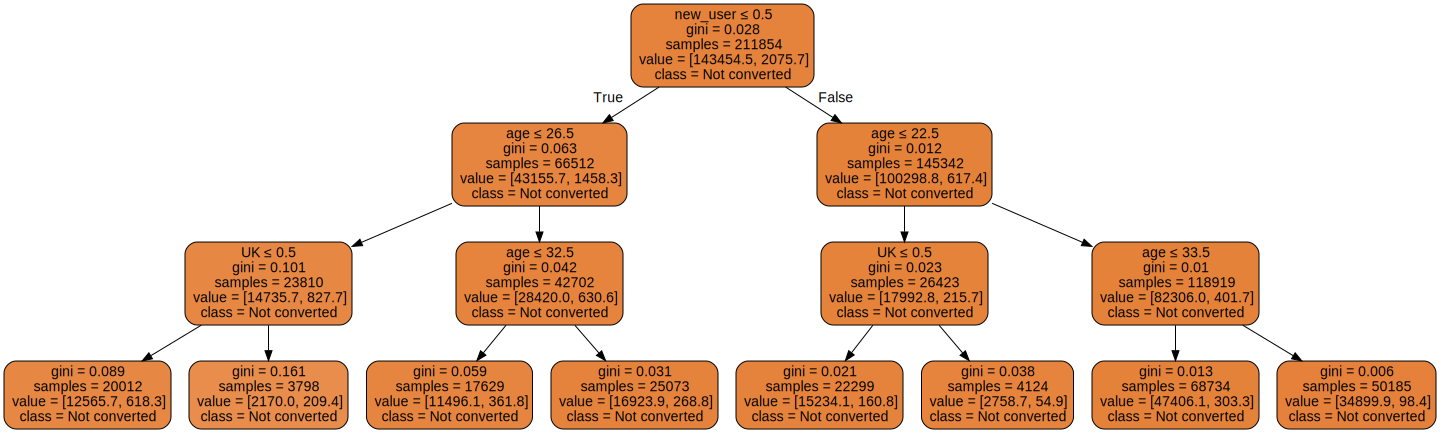

In [154]:
import graphviz 

# Visualization
features = list(X_train.columns)
targets = ['Not converted', 'converted']
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features, class_names=targets, 
                                filled=True, rounded=True, special_characters=True, )  
graph = graphviz.Source(dot_data)
graph

### Conclusions and suggestions:
1. The Germany has a great conversion rate but a small proportion. Marketing should get more Germans.
2. China has a big population but the conversion rate is extremely small. Need researching on the china-base websites to see what is wrong. Maybe there are poor translation or no translation of the websites.
3. New users do not convert as much as older accounts. We could forcus on improving retention of users. Targeted emails that bring back old users worth a try.
4. Young users is also an important part for conversion. We should advitise and targeting more on young people.
5. Total pages visited has a great correlation with the conversion rate. We could go through the people who visits great amount of pages but do not buy and offer targeted offers or send reminders. Afterall, those people have the biggest chance to convert.